# RAPPORT PROJET POKEMON

Pour ce projet nous avons décidé de travailler avec des données sur des pokémon. L'objectif est double, une première partie consistera à prédire un pokémon à partir d'une image, la deuxième partie aura pour but de voir si les caractéristiques d'un pokémon pouvaient prédire son type. Pour illustrer notre travail, nous avons mis en place une interface graphique qui utilise ses deux modèles de prédictions.

## Prédiction du type d'un pokémon

Nous voulions savoir si les statistiques d'un pokémon pouvais expliquée correctement son type principal. L'objectif de cette partie va êtres de déterminer la meilleure méthode pour prédir le type d'un pokémon. Pour cela nous partons d'un jeu de données avec plusieurs informations sur 721 pokémon, dont leurs statistiques. 

In [56]:
import numpy as np
import pandas as pd

data = pd.read_csv("./pokemon/pokemon.csv")
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,120,Staryu,Water,NaN,340,30,45,55,70,55,...,Brown,False,NaN,Water_3,NaN,False,0.79,34.5,225,head_base
120,121,Starmie,Water,Psychic,520,60,75,85,100,85,...,Purple,False,NaN,Water_3,NaN,False,1.09,80.0,60,head_base
121,122,Mr._Mime,Psychic,Fairy,460,40,45,65,100,120,...,Pink,True,0.500,Human-Like,NaN,False,1.30,54.5,45,bipedal_tailless
122,123,Scyther,Bug,Flying,500,70,110,80,55,80,...,Green,True,0.500,Bug,NaN,False,1.50,56.0,45,four_wings


In [16]:
Y = data["Type_1"]
X = data.drop("Type_1",axis=1)

In [17]:
#On garde "HP","Attack","Defense","Sp_Atk","Sp_Def","Speed","Color","Height_m","Weight_kg","Body_Sty"
X = data.drop("Type_1",axis=1)
X_simple = X.drop(["Number","Name","Type_2","Total","Generation","isLegendary","hasGender","Pr_Male","Egg_Group_1","Egg_Group_2","hasMegaEvolution","Catch_Rate","Height_m","Weight_kg"], axis = 1)
X_simple.head()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Body_Style
0,45,49,49,65,65,45,Green,quadruped
1,60,62,63,80,80,60,Green,quadruped
2,80,82,83,100,100,80,Green,quadruped
3,39,52,43,60,50,65,Red,bipedal_tailed
4,58,64,58,80,65,80,Red,bipedal_tailed


On décide donc de garder ces statistiques pour notre prédiction, on va aussi garder deux variables qualitatives car nous pensons qu'elles peuvent avoir une forte influence sur le type d'un pokémon. On conserve donc les HP, les différentes statistiques d'attaque et défense, la vitesse, la couleur et le style de corps.

In [18]:
print(X_simple.shape)
print(X_simple.count()) #Aucune valeur manquante

(721, 8)
HP            721
Attack        721
Defense       721
Sp_Atk        721
Sp_Def        721
Speed         721
Color         721
Body_Style    721
dtype: int64


In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_simple["Color"] = le.fit_transform(X_simple["Color"] ) #transforme la couleur en numérique
X_simple["Body_Style"] = le.fit_transform(X_simple["Body_Style"] ) #transforme le style de corps en numérique
#X_simple["Body_Style"].value_counts()

Avant de commencer on doit effectuer quelques modifications. D'abord on vérifie si nous avons des valeurs manquantes, on remarque qu'il n'y en a pas. Ensuite on dois transformer nos deux variables qualitatives en variables quantitatives.

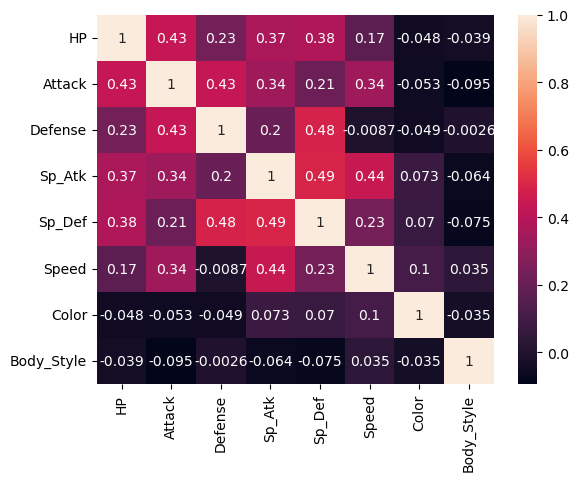

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = X_simple.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

On commence par évaluer le lien entre nos variables pour savoir s'il y a de la redondance d'informations entre deux variables. On réalise une matrice des corrélations, ici il n'y a pas de coefficient de corrélation élevé donc aucune variable à un fort lien. On les conservera toutes pour la prédiction.

In [21]:
from sklearn.model_selection import train_test_split

splitnum = 2 # To compare fairly the various methods, we will split the examples in the same way for train/test

X_train, X_test, y_train, y_test = train_test_split(X_simple, Y,random_state=splitnum)

In [22]:
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier


#différente méthode 
lr = LogisticRegression()
svc = LinearSVC()
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
rfc = RandomForestClassifier()
rfc_1 = RandomForestClassifier()


# Fit : Entraine le modele
# Predict : compare la reponse du modele par ropport au vrai données

On va comparer 4 modèles avec nos données. Nous utiliserons, une régression logistique, un Support Vector, un Random Forest et une classification utilisant la descente de gradient stochastique. On sortira les scores de ces différentes méthodes afin de déterminer la meilleure.

In [23]:
#régression logistique 

lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
score_lr = accuracy_score(y_test, y_pred_lr)
#print(score_lr)

C:\Users\ilias\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Support Vector

svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
score_svc = accuracy_score(y_test, y_pred_svc)
#print(score_svc)

C:\Users\ilias\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
#Random Forest

rfc_1.fit(X_train,y_train)
y_pred_rfc = rfc_1.predict(X_test)
score_rfc_1 = accuracy_score(y_test, y_pred_rfc)
#print(score_rfc)

In [26]:
# classification utilisant la descente de gradient stochastique

clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
score_clf = accuracy_score(y_test, y_pred_clf)
#print(score_clf)

C:\Users\ilias\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [27]:
#score_most_pop = sum(1-y_test)/y_test.size

print("Accuracy:\n Logistic Reg: {} \n Support Vector: {} \n Random Forest: {} \n SGDClassifier : {}".format(score_lr.round(3),score_svc.round(3),score_rfc_1.round(3),score_clf.round(3)))

Accuracy:
 Logistic Reg: 0.249 
 Support Vector: 0.116 
 Random Forest: 0.381 
 SGDClassifier : 0.055


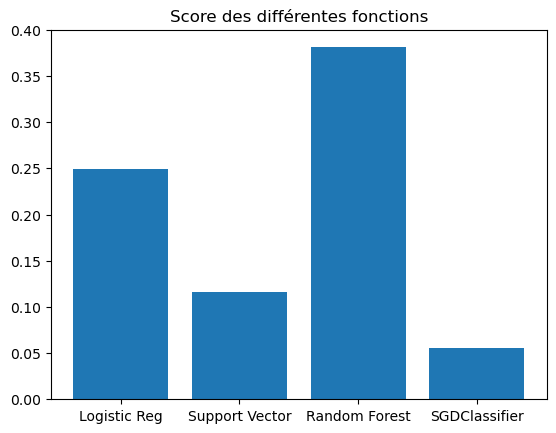

In [28]:
import matplotlib.pyplot as plt

# données à afficher dans le diagramme en barre
score = [score_lr.round(3),score_svc.round(3),score_rfc_1.round(3),score_clf.round(3)]

# créer un diagramme en barre en utilisant les données et les étiquettes pour les barres
plt.bar(range(len(score)), score, tick_label=['Logistic Reg', 'Support Vector', 'Random Forest', 'SGDClassifier'])

# ajouter un titre
plt.title('Score des différentes fonctions')

# afficher le diagramme
plt.show()

On voit que le random Forest à le score le plus élevé, donc réalise la meilleure prédiction sur notre jeu de données. Les autres méthodes n'obtiennent pas des scores conséquents. Le random Forest est certes la meilleure méthode, mais à un score qui tourne autour de 35%, une valeur qui peut être insuffisantes pour prédire le type d'un pokémon. Les statistiques ainsi que la couleur et le type de corps ne semblent pas constituer des informations convenables pour prédire le type d'un pokémon. Pour le voir nous allons tester sur un pokémon particulier nos différentes méthodes.

On utilisera les caractéristiques du pokémon Chimpenfeu afin de retrouver son type feu.

In [29]:
#Couleur rouge = 7
# bipedal_tailed = 0

# Créer un dictionnaire Python avec les caractéristiques de Chimpenfeu 
donnees = {'HP': [64],
           'Attack': [78],
           'Defense': [52],
           'Sp_Atk': [78],
           'Sp_Def': [52],
          'Speed': [81],
           'Color': [7],
          'Body_Style': [0],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [30]:
#Support Vector

y_pred_svc_1 = svc.predict(df)
y_pred_svc_1 #Ne prédit pas le bon type 

array(['Fairy'], dtype=object)

In [31]:
#SGDClassifier

y_pred_clf_1 = clf.predict(df)
y_pred_clf_1 #Ne prédit le bon type mais pas toujours

array(['Steel'], dtype='<U8')

In [32]:
#Logistic Reg

y_pred_lr_1 = lr.predict(df)
y_pred_lr_1 #Prédit le bon type  

array(['Fire'], dtype=object)

In [34]:
#Random Forest

y_pred_rfc_1 = rfc_1.predict(df)
y_pred_rfc_1  #Prédit le bon type 

array(['Fire'], dtype=object)

Quand on teste avec les données d'un seul pokémon, le modèle Support Vector ne prédit pas le type feu de Chimpenfeu, ce qui est cohérent quand on voit son score. Le SGDClassifier ne prédit pas toujours le bon type, son score varie beaucoup quand on crée le modèle sur nos données, ce qui explique que sa prédiction est aléatoire. La régression logistique et le Random Forest quant à eux prédisent le bon type de notre pokémon. 

Le problème est que Chimpenfeu est présent dans nos données, on va donc refaire nos deux meilleurs méthode avec un pokémon de la dernière génération qui n'est pas pris en compte dans nos données.

On choisit Otaquin un pokémon de type eau.

In [35]:
#Couleur bleu = 1
# with_fins = 13

# Créer un dictionnaire Python avec les caractéristiques de Otaquin 
donnees = {'HP': [50],
           'Attack': [54],
           'Defense': [54],
           'Sp_Atk': [66],
           'Sp_Def': [56],
          'Speed': [40],
           'Color': [1],
          'Body_Style': [13],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df2 = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [36]:
#Logistic Reg

y_pred_lr_1 = lr.predict(df2)
y_pred_lr_1 #Prédit le bon type

array(['Water'], dtype=object)

In [38]:
#Random Forest

y_pred_rfc_1 = rfc_1.predict(df2)
y_pred_rfc_1  #Prédit le bon type 

array(['Water'], dtype=object)

Les deux méthodes avec le meilleur score arrivent à retrouver le type eau d'Otaquin. Les 35% de score du random Forest semblait ne pas être consistant, mais sur ces deux exemples la prédiction est correcte.

Nous avons eu envie de tester les limites de la méthode Random Forest car nous accusons la couleur d'avoir un effet important sur la prédiction. On va donc faire un modèle qui ne prend pas en compte la couleur.

In [39]:
X = data.drop("Type_1",axis=1)
X_simple2 = X.drop(["Number","Name","Type_2","Total","Generation","isLegendary","hasGender","Pr_Male","Egg_Group_1","Egg_Group_2","hasMegaEvolution","Catch_Rate","Height_m","Weight_kg","Color"], axis = 1)
#X_simple2.head()

In [40]:
X_simple2["Body_Style"] = le.fit_transform(X_simple2["Body_Style"] ) #transforme le style de corps en numérique
#X_simple2.head()

In [41]:
from sklearn.model_selection import train_test_split

splitnum = 2 # To compare fairly the various methods, we will split the examples in the same way for train/test

X_train, X_test, y_train, y_test = train_test_split(X_simple2, Y,random_state=splitnum)

In [42]:
#Random Forest

rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
score_rfc_2 = accuracy_score(y_test, y_pred_rfc)
print(score_rfc_2.round(3))

0.315


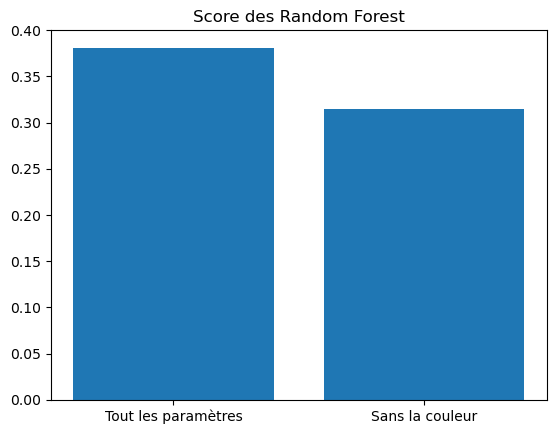

In [43]:
# données à afficher dans le diagramme en barre
score = [score_rfc_1.round(3),score_rfc_2.round(3)]

# créer un diagramme en barre en utilisant les données et les étiquettes pour les barres
plt.bar(range(len(score)), score, tick_label=[ 'Tout les paramètres', 'Sans la couleur'])

# ajouter un titre
plt.title('Score des Random Forest')

# afficher le diagramme
plt.show()

On compare le score précédent au score sans la couleur. Il y a forcément une diminution, elle est environ de 5%, le modèle tournait déjà avec un score assez faible on va voir s'il arrive à retrouver le type eau d'Ottaquin.

In [44]:
#Couleur bleu = 1
# with_fins = 13

# Créer un dictionnaire Python avec les caractéristiques de Otaquin 
donnees = {'HP': [50],
           'Attack': [54],
           'Defense': [54],
           'Sp_Atk': [66],
           'Sp_Def': [56],
          'Speed': [40],
           #'Color': [1],
          'Body_Style': [13],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df3 = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [45]:
#Random Forest

y_pred_rfc_1 = rfc.predict(df3)
y_pred_rfc_1  #Prédit la bonne valeur 

array(['Water'], dtype=object)

Le modèle prédit encore le bon type. Deux hypothèses s'offrent à nous soit le modèle est efficace, soit Ottaquin a des caractéristiques qui expliquent bien son type et constitue un cas particulier ou la prédiction fonctionne bien.

Nous allons aussi enlever le type de corps afin de conserver uniquement les statistiques d'un pokémon dans le modèle.

In [46]:
X = data.drop("Type_1",axis=1)
X_simple3 = X.drop(["Number","Name","Type_2","Total","Generation","isLegendary","hasGender","Pr_Male","Egg_Group_1","Egg_Group_2","hasMegaEvolution","Catch_Rate","Height_m","Weight_kg","Color","Body_Style"], axis = 1)

from sklearn.model_selection import train_test_split

splitnum = 2 # To compare fairly the various methods, we will split the examples in the same way for train/test

X_train, X_test, y_train, y_test = train_test_split(X_simple3, Y,random_state=splitnum)

In [47]:
#Random Forest

rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
score_rfc_3 = accuracy_score(y_test, y_pred_rfc)
print(score_rfc_3.round(3))

0.232


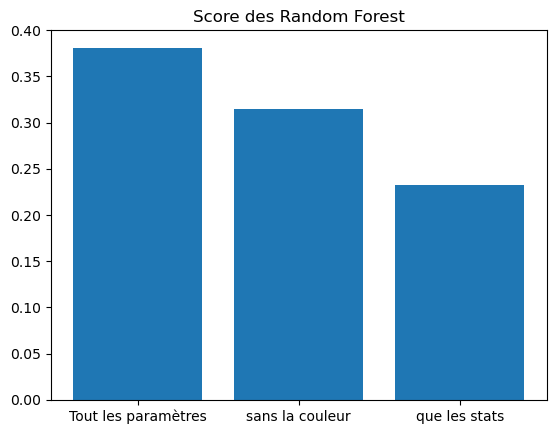

In [48]:
# données à afficher dans le diagramme en barre
score = [score_rfc_1.round(3),score_rfc_2.round(3),score_rfc_3.round(3)]

# créer un diagramme en barre en utilisant les données et les étiquettes pour les barres
plt.bar(range(len(score)), score, tick_label=[ 'Tout les paramètres', 'sans la couleur','que les stats'])

# ajouter un titre
plt.title('Score des Random Forest')

# afficher le diagramme
plt.show()

Le modèle perd encore du score, la prédiction devient vraiment très peu fiable. Le score tourne autour des 20%.

In [49]:
#Couleur bleu = 1
# with_fins = 13

# Créer un dictionnaire Python avec les caractéristiques de Otaquin 
donnees = {'HP': [50],
           'Attack': [54],
           'Defense': [54],
           'Sp_Atk': [66],
           'Sp_Def': [56],
          'Speed': [40],
           #'Color': [1],
          #'Body_Style': [13],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df4 = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [50]:
#Random Forest

y_pred_rfc_1 = rfc.predict(df4)
y_pred_rfc_1  #Prédit la bonne valeur 

array(['Water'], dtype=object)

Malgré un score très peu fiable, le type eau d'Ottaquin arrive encore à être prédit. Ce pokémon semble donc constituer un cas particulier. Quand on teste avec d'autres pokémon de la dernière génération, on se rend compte des limites du modèle.

On va choisir de conserver le modèle avec tous les paramètres afin de l'inclure dans une interface graphique. On sauvegarde le modèle et l'essaye sur deux autres pokémon. On choisit Vémini un pokémon de type poison et Rubombelle un pokémon de type insecte.

In [51]:
#Sauvegarde du modèle
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(rfc_1, f)

In [52]:
#Pour ouvrir le modèle
with open('model.pkl', 'rb') as f: 
    model = pickle.load(f)

In [53]:
#Couleur violet = 6
# bipedal_tailed = 0

# Créer un dictionnaire Python avec les caractéristiques de Vemini 
donnees = {'HP': [67],
           'Attack': [73],
           'Defense': [67],
           'Sp_Atk': [73],
           'Sp_Def': [67],
          'Speed': [73],
           'Color': [6],
          'Body_Style': [0],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df5 = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [54]:
model.predict(df5) #mauvaise prédiction

array(['Fire'], dtype=object)

In [57]:
#Couleur jaune = 9
# four_wings = 2

# Créer un dictionnaire Python avec les caractéristiques de Rubombelle 
donnees = {'HP': [60],
           'Attack': [55],
           'Defense': [60],
           'Sp_Atk': [95],
           'Sp_Def': [70],
          'Speed': [124],
           'Color': [1],
          'Body_Style': [2],
           }

# Créer un dataframe à partir du dictionnaire en utilisant la fonction DataFrame() de pandas
df6 = pd.DataFrame(donnees)

# Afficher le dataframe en utilisant la fonction print() de Python
#print(df)

In [58]:
model.predict(df6) #mauvaise prédiction

array(['Psychic'], dtype=object)

C'est deux exemples illustres bien les limites du modèle, car les deux prédictions, avec le meilleur modèle, sont fausses. On peut en conclure que premièrement la prédiction du type eau d'Ottaquin est un cas particulier, deuxièmement que les statistisques avec la couleur et la forme du corps d'un pokémon ne constituent pas des informations suffisantes pour pré-dir le type d'un pokémon.